In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [38]:
df = pd.read_csv('Temp_Hum_Record.txt',delimiter='\\t')

<ipython-input-38-795d39bc2fbc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('Temp_Hum_Record.txt',delimiter='\\t')


In [39]:
X_train = df['ObsNo']
y_train = df['Temperature_Noted']
z_train = df['Humidity_Noted']

In [40]:
X_test = np.asarray([72,73,74,75,76,77,78,79])

In [41]:
X_train = X_train.values.reshape((-1,1))
y_train = y_train.values.reshape((-1,1))
z_train = z_train.values.reshape((-1,1))
X_test = X_test.reshape((-1,1))

In [42]:
pofeat = PolynomialFeatures(degree=4)

In [43]:
X = pofeat.fit_transform(X_train)
Xt = pofeat.fit_transform(X_test)

In [44]:
lreg = linear_model.LinearRegression(n_jobs=-1)
lreg.fit(X, y_train)

LinearRegression(n_jobs=-1)

In [45]:
forecast = lreg.predict(Xt)
trained = lreg.predict(X)
print("Forecasting Tempreture")
print(forecast)

Forecasting Tempreture
[[31.17825448]
 [31.12704724]
 [31.07757834]
 [31.03012687]
 [30.98497665]
 [30.94241629]
 [30.90273915]
 [30.86624337]]


In [46]:
pofeat1 = PolynomialFeatures(degree=3)

In [47]:
X1 = pofeat1.fit_transform(X_train)
Xt1 = pofeat1.fit_transform(X_test)

In [48]:
lreg1 = linear_model.LinearRegression(n_jobs=-1)
lreg1.fit(X1,z_train)

LinearRegression(n_jobs=-1)

In [49]:
forecast1 = lreg1.predict(Xt1)
trained1 = lreg1.predict(X1)
print("Forecasting Humidity")
print(forecast1)

Forecasting Humidity
[[87.15826649]
 [88.37318598]
 [89.64285921]
 [90.96804796]
 [92.34951401]
 [93.78801915]
 [95.28432515]
 [96.8391938 ]]


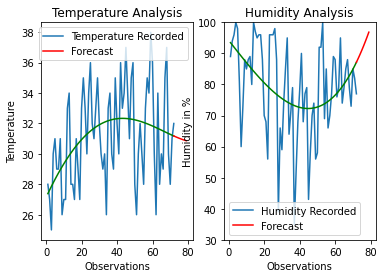

In [50]:
fig=plt.figure()
plt1=fig.add_subplot(121, xlabel='Observations', ylabel='Temperature', title='Temperature Analysis')
plt1.plot(df['ObsNo'], df['Temperature_Noted'], label='Temperature Recorded')
plt1.plot(df['ObsNo'], trained, color='g')
plt1.plot(X_test, pred, color='r', label='Forecast')
plt1.legend()

plt2=fig.add_subplot(122, ylim=(30,100), xlabel='Observations', ylabel='Humidity in %', title='Humidity Analysis')
plt2.plot(df['ObsNo'], df['Humidity_Noted'], label='Humidity Recorded')
plt2.plot(df['ObsNo'], trained1, color='g')
plt2.plot(X_test, pred1, color='r', label='Forecast')
plt2.legend()

plt.show()